## Multiple Monitor Example

In [16]:
clear

In [17]:
cd ..
cd ..
cd ..
init
cd examples/TemporalExamples/MultipleMonitors

Generate a monitor object from the script fine 

multipleMonitors.mls (contained in this folder)
this object is an implementation of MoonlightEngine class, please refer to the doc of this class for more details (ex. write in console "doc MoonlightEngine" )

In [21]:
monitor = MoonlightEngine.load("multipleMonitors");

> In javaclasspath>local_javapath (line 195)
  In javaclasspath (line 124)
  In javaaddpath (line 71)
  In MoonlightEngine.load (line 21)


Generate a signal [time, x, y]  where x= sin(t) and y = cos(t)

In [22]:
trajFunction = @(t)[sin(t);cos(t)]';
time = 0:0.1:pi;
values = trajFunction(time);

evaluate the BooleanMonitorScript defined in multipleMonitors.mls

Formula: globally [0, 0.2]  #[ x > y ]#

In [23]:
[booleanMonitorResult,t] = monitor.temporalMonitor("BooleanMonitorScript",time,values);
disp(t)
%evalaute the QuantitativeMonitorScript defined in multipleMonitors.mls
%Formula: globally [0, 0.2]  #[ x > y ]#
[quantiativeMonitorResult,t] = monitor.temporalMonitor("QuantitativeMonitorScript",time,values);
disp(t)

    0.0066

   7.1460e-04



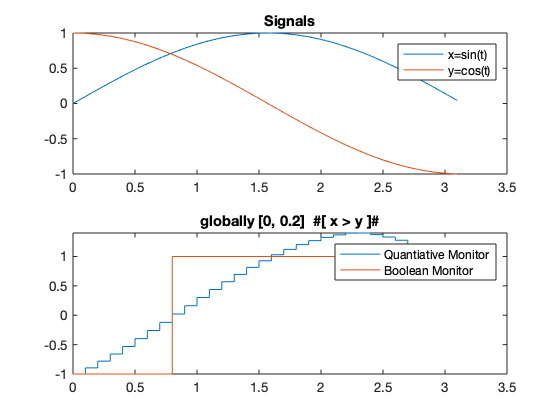

In [24]:
tiledlayout(2,1)
nexttile
plot(time, sin(time))
hold on
plot(time, cos(time))
title('Signals')
legend('x=sin(t)','y=cos(t)')
nexttile
stairs(quantiativeMonitorResult(:,1),quantiativeMonitorResult(:,2))
hold on
%We add a last point to the boolean monitor to plot it easily!
boolean = [booleanMonitorResult;time(end), booleanMonitorResult(2,end)];
stairs(boolean(:,1),boolean(:,2))
title('globally [0, 0.2]  #[ x > y ]#')
legend('Quantiative Monitor','Boolean Monitor')